# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-22 22:06:37--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-22 22:06:38--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

c

In [ ]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [ ]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [ ]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [ ]:
df.head(10)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
5,I227836,C657758,Female,28,Clothing,5,1500.40,Credit Card,24/05/2022,Forum Istanbul
6,I121056,C151197,Female,49,Cosmetics,1,40.66,Cash,13/03/2022,Istinye Park
7,I293112,C176086,Female,32,Clothing,2,600.16,Credit Card,13/01/2021,Mall of Istanbul
8,I293455,C159642,Male,69,Clothing,3,900.24,Credit Card,4/11/2021,Metrocity
9,I326945,C283361,Female,60,Clothing,2,600.16,Credit Card,22/08/2021,Kanyon


**Principalmente se deberían tomar los valores de su actividad comercial, tales como 'price' y 'category', pues así se podrá conocer cómo se comporta el cliente y que preferencias tiene**

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [ ]:
# Conteo de valores únicos en cada columna
unique_counts = df.nunique().reset_index()
unique_counts.columns = ['Columna', 'Valores_Únicos']

# Mostrar la tabla
print("Conteo de valores únicos por columna:")
display(unique_counts)

Conteo de valores únicos por columna:


,Columna,Valores_Únicos
0,invoice_no,99457
1,customer_id,99457
2,gender,2
3,age,52
4,category,8
5,quantity,5
6,price,40
7,payment_method,3
8,invoice_date,797
9,shopping_mall,10


In [ ]:
# Conteo de valores nulos (faltantes)
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Columna', 'Valores_Nulos']

# Mostrar la tabla
print("Valores nulos por columna:")
display(missing_values)

Valores nulos por columna:


,Columna,Valores_Nulos
0,invoice_no,0
1,customer_id,0
2,gender,0
3,age,0
4,category,0
5,quantity,0
6,price,0
7,payment_method,0
8,invoice_date,0
9,shopping_mall,0


## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [ ]:
df['total_value'] = df['quantity'] * df['price']
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


**Analizar la actividad comercial por centro comercial**

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

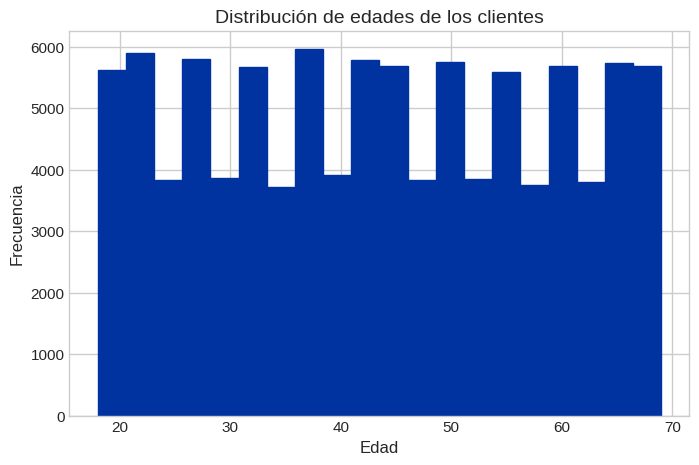

In [ ]:
import matplotlib.pyplot as plt

# Configuración de estilo opcional
plt.style.use('seaborn-v0_8-whitegrid')

# Crear la figura
plt.figure(figsize=(8, 5))
plt.hist(df['age'], bins=20, edgecolor='#0033A0')

# Títulos y etiquetas
plt.title('Distribución de edades de los clientes', fontsize=14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar la gráfica
plt.show()

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [ ]:
# =============================================================================
# 6. Definición de Criterios de Segmentación Demográfica
# =============================================================================

import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('customer_shopping_data.csv')

# Create the total_value column if it doesn't exist
if 'total_value' not in df.columns:
    df['total_value'] = df['quantity'] * df['price']

# Agrupar por género
gender_segment = df.groupby('gender').agg({
    'customer_id': 'nunique',   # número de clientes distintos
    'invoice_no': 'nunique',    # número de compras (facturas)
    'total_value': 'sum'              # total gastado
}).reset_index()

# Calcular gasto promedio por cliente
gender_segment['avg_spent_per_customer'] = gender_segment['total_value'] / gender_segment['customer_id']

display(gender_segment)

,gender,customer_id,invoice_no,total_value,avg_spent_per_customer
0,Female,59482,59482,1.502071e+08,2525.253623
1,Male,39975,39975,1.012987e+08,2534.050237


In [ ]:
# Crear rangos de edad (puedes ajustar los límites según tus datos)
bins = [0, 18, 25, 35, 45, 55, 65, 120]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

# Agrupar por rango de edad
age_segment = df.groupby('age_group').agg({
    'customer_id': 'nunique',
    'invoice_no': 'nunique',
    'total_value': 'sum'  # Corrected column name
}).reset_index()

age_segment['avg_spent_per_customer'] = age_segment['total_value'] / age_segment['customer_id']

display(age_segment)

/tmp/ipython-input-2190725971.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_segment = df.groupby('age_group').agg({


,age_group,customer_id,invoice_no,total_value,avg_spent_per_customer
0,<18,0,0,0.00,NaN
1,18-25,13496,13496,33454083.87,2478.814750
2,26-35,19081,19081,47805115.52,2505.377890
3,36-45,19401,19401,50077040.30,2581.157688
4,46-55,19049,19049,48403625.37,2541.006109
5,56-65,19003,19003,47839352.76,2517.463177
6,65+,9427,9427,23926576.43,2538.090212


La segmentación combinada por edad y género permite dirigir los esfuerzos de marketing con precisión:

Los jóvenes deben ser abordados con campañas digitales y promociones dinámicas.

Los adultos requieren mensajes de valor, exclusividad y servicio.

Las mujeres pueden ser foco de estrategias de fidelización y recompensas.

Los hombres responden mejor a estrategias de conveniencia y diferenciación por calidad.

## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [ ]:
# Tabla resumen por categoría
category_summary = df.groupby('category').agg({
    'quantity': 'sum',      # cantidad total comprada
    'total_value': 'sum',         # valor monetario total
    'invoice_no': 'nunique' # número de transacciones distintas
}).sort_values('total_value', ascending=False)

display(category_summary)

,quantity,total_value,invoice_no
category,,,
Clothing,103558,1.139968e+08,34487
Shoes,30217,6.655345e+07,10034
Technology,15021,5.786235e+07,4996
Cosmetics,45465,6.792863e+06,15097
Toys,30321,3.980426e+06,10087
Food & Beverage,44277,8.495351e+05,14776
Books,14982,8.345529e+05,4981
Souvenir,14871,6.358247e+05,4999


In [ ]:
payment_summary = df.groupby('payment_method').agg({
    'invoice_no': 'nunique',
    'total_value': 'sum'
}).sort_values('total_value', ascending=False)

display(payment_summary)

,invoice_no,total_value
payment_method,,
Cash,44447,1.128322e+08
Credit Card,34931,8.807712e+07
Debit Card,20079,5.059643e+07


In [ ]:
mall_summary = df.groupby('shopping_mall').agg({
    'invoice_no': 'nunique',
    'total_value': 'sum'
}).sort_values('total_value', ascending=False)

display(mall_summary)

,invoice_no,total_value
shopping_mall,,
Mall of Istanbul,19943,50872481.68
Kanyon,19823,50554231.10
Metrocity,15011,37302787.33
Metropol AVM,10161,25379913.19
Istinye Park,9781,24618827.68
Zorlu Center,5075,12901053.82
Cevahir AVM,4991,12645138.20
Viaport Outlet,4914,12521339.72
Emaar Square Mall,4811,12406100.29


In [ ]:
# Ejemplo: método de pago por categoría
category_payment = pd.crosstab(df['category'], df['payment_method'])

# Ejemplo: categoría más popular por centro comercial
mall_category = df.groupby(['shopping_mall', 'category'])['invoice_no'].nunique().unstack(fill_value=0)


**La categoria es el factor más crucial para la estretegia, pues en base a esto se podrá segmentar específicamente cada cliente, después puede ser complementada con método de pago y shopping mall**

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

In [ ]:
# Crear rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# Agrupar por grupo de edad y categoría
age_category_summary = df.groupby(['age_group', 'category'])['total_value'].sum().unstack(fill_value=0)

# Mostrar tabla
print(age_category_summary)

category       Books     Clothing   Cosmetics  Food & Beverage        Shoes  \
age_group                                                                     
18-25      138667.95  17377932.88  1029063.94        130169.47  10331926.55   
26-35      155999.55  21785207.84  1302827.72        164582.87  12805827.29   
36-45      159271.95  22015069.12  1327955.60        170110.98  13297966.69   
46-55      157044.90  22271937.60  1314375.16        159535.92  12629977.48   
56-65      158166.00  21746197.44  1295590.24        161596.54  12525547.90   
65+         65402.55   8800446.16   523050.24         63539.27   4962205.56   

category    Souvenir  Technology       Toys  
age_group                                    
18-25       99658.08   8374800.0  636052.48  
26-35      128783.67  10780350.0  756080.64  
36-45      120830.73  12318600.0  774430.72  
46-55      112209.18  10836000.0  738662.40  
56-65      129464.01  11113200.0  763248.64  
65+         44878.98   4439400.0  311951.36  

/tmp/ipython-input-2909798225.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_summary = df.groupby(['age_group', 'category'])['total_value'].sum().unstack(fill_value=0)


<Figure size 1000x600 with 0 Axes>

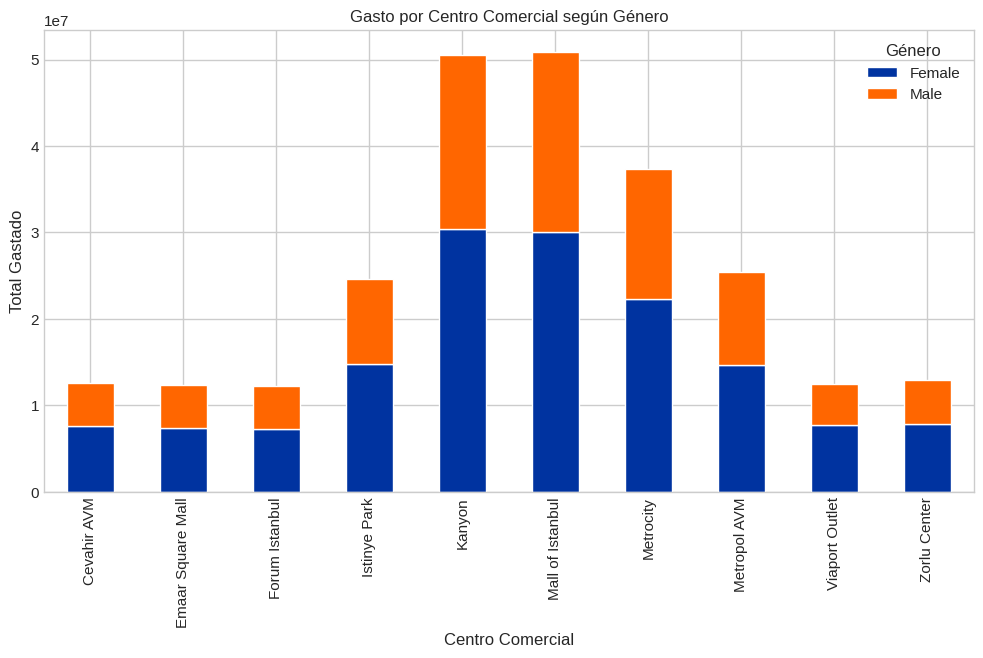

In [ ]:
mall_gender = df.groupby(['shopping_mall', 'gender'])['total_value'].sum().unstack(fill_value=0)

plt.figure(figsize=(10,6))
mall_gender.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Gasto por Centro Comercial según Género")
plt.xlabel("Centro Comercial")
plt.ylabel("Total Gastado")
plt.legend(title="Género")
plt.show()

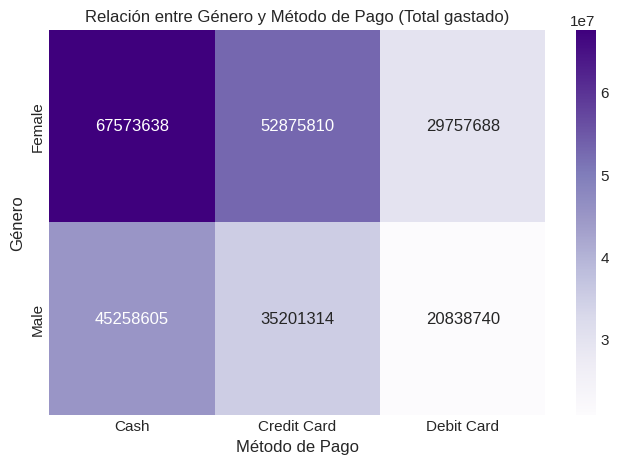

In [ ]:
gender_payment = pd.crosstab(df['gender'], df['payment_method'], values=df['total_value'], aggfunc='sum').fillna(0)

plt.figure(figsize=(8,5))
sns.heatmap(gender_payment, cmap="Purples", annot=True, fmt=".0f")
plt.title("Relación entre Género y Método de Pago (Total gastado)")
plt.xlabel("Método de Pago")
plt.ylabel("Género")
plt.show()

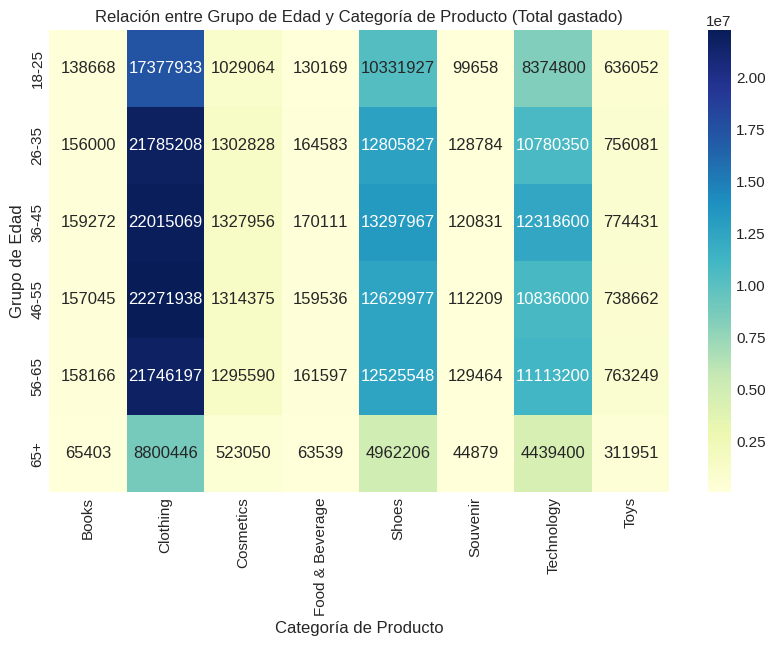

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(age_category_summary, cmap="YlGnBu", annot=True, fmt=".0f")
plt.title("Relación entre Grupo de Edad y Categoría de Producto (Total gastado)")
plt.xlabel("Categoría de Producto")
plt.ylabel("Grupo de Edad")
plt.show()

<Figure size 1000x600 with 0 Axes>

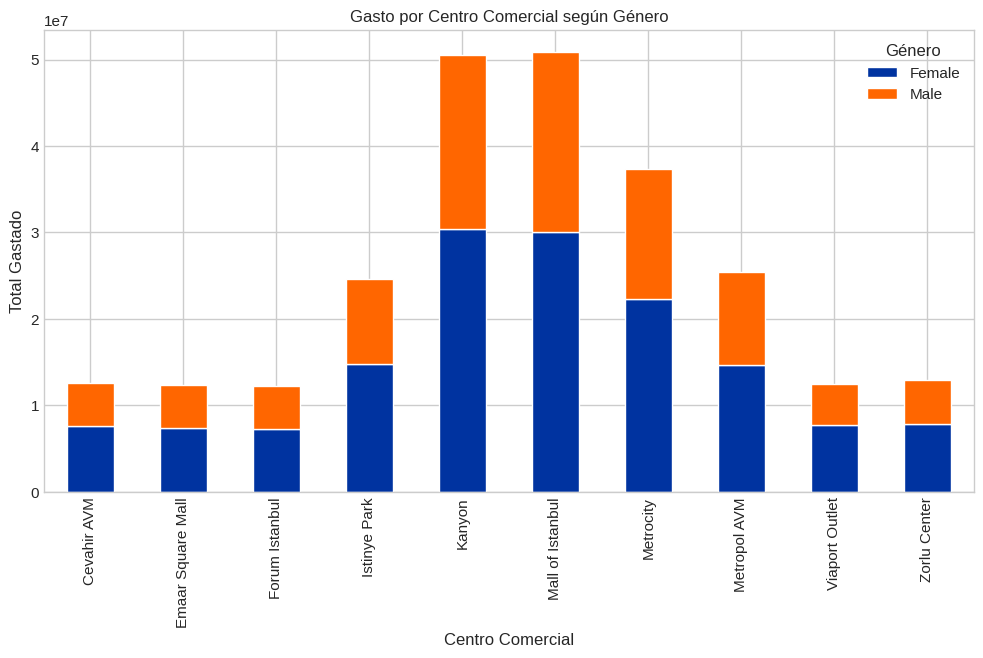

In [ ]:
mall_gender = df.groupby(['shopping_mall', 'gender'])['total_value'].sum().unstack(fill_value=0)

plt.figure(figsize=(10,6))
mall_gender.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Gasto por Centro Comercial según Género")
plt.xlabel("Centro Comercial")
plt.ylabel("Total Gastado")
plt.legend(title="Género")
plt.show()

Adultos entre 36–55 años que compran Electrónica y Hogar y usan Tarjeta de Crédito → clientes consolidados, alto poder adquisitivo.

Mujeres entre 26–45 años que compran Moda y Calzado y prefieren compras en malls premium → clientes fieles con recurrencia alta.

Hombres jóvenes (18–35) que pagan con Ewallet o Tarjeta en categorías tecnológicas → público innovador con potencial de crecimiento


## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

🔹 Cantidad de registros por categoría:
category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64


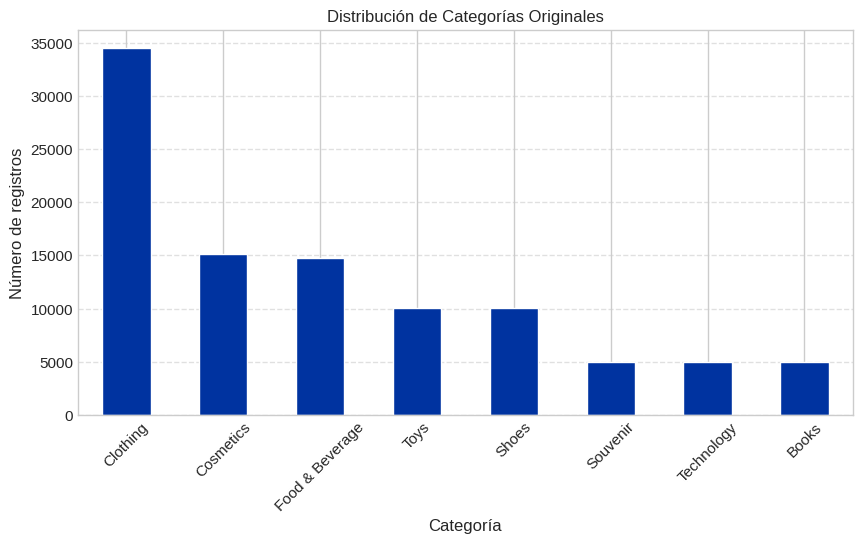

In [ ]:
category_counts = df['category'].value_counts()

print("🔹 Cantidad de registros por categoría:")
print(category_counts)

# Visualizar
plt.figure(figsize=(10,5))
category_counts.plot(kind='bar')
plt.title("Distribución de Categorías Originales")
plt.xlabel("Categoría")
plt.ylabel("Número de registros")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [ ]:
# Definir un umbral para identificar las categorías pequeñas
threshold = 0.05 * len(df)  # menos del 5% del total de registros

low_volume_categories = category_counts[category_counts < threshold].index
print("🔹 Categorías con pocos registros:")
print(list(low_volume_categories))

🔹 Categorías con pocos registros:
[]


In [ ]:
# Crear una copia para no modificar el dataset original
df['category_grouped'] = df['category']

# Agrupar categorías pequeñas en "Otros"
df.loc[df['category'].isin(low_volume_categories), 'category_grouped'] = 'Otros'

# Opcional: agrupar por similitud temática
df['category_grouped'] = df['category_grouped'].replace({
    'Electronics Accessories': 'Tecnología/Entretenimiento',
    'Toys': 'Tecnología/Entretenimiento',
    'Books': 'Tecnología/Entretenimiento',
    'Beauty': 'Moda/Belleza',
    'Cosmetics': 'Moda/Belleza'
})

🔹 Nueva distribución de categorías agrupadas:
category_grouped
Clothing                      34487
Moda/Belleza                  15097
Tecnología/Entretenimiento    15068
Food & Beverage               14776
Shoes                         10034
Souvenir                       4999
Technology                     4996
Name: count, dtype: int64


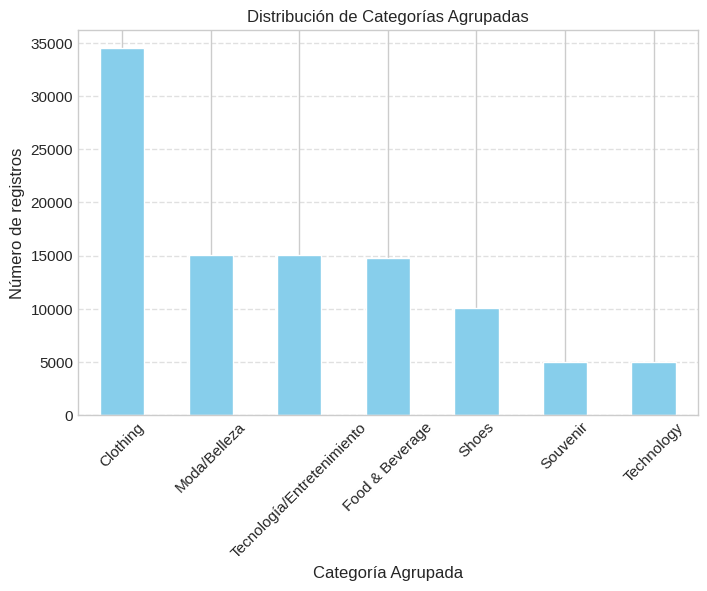

In [ ]:
new_category_counts = df['category_grouped'].value_counts()

print("🔹 Nueva distribución de categorías agrupadas:")
print(new_category_counts)

# Visualizar el resultado
plt.figure(figsize=(8,5))
new_category_counts.plot(kind='bar', color='skyblue')
plt.title("Distribución de Categorías Agrupadas")
plt.xlabel("Categoría Agrupada")
plt.ylabel("Número de registros")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

Toys, Books, Electronics Accessories - Tecnología/Entretenimiento -	Son productos de consumo ocasional, relacionados con tecnología o recreación.

Beauty, Cosmetics	- Moda/Belleza	Productos afines en tipo de cliente y uso.

Las restantes con baja frecuencia	'Otros'	Evita sobrecargar los gráficos con categorías poco representativas.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [ ]:
# --- 1️⃣ Crear grupos de edad ---
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# --- 2️⃣ (Si no existe aún) Crear columna de categoría reducida ---
def reducir_categoria(cat):
    if cat in ['Clothing', 'Shoes', 'Accessories', 'Beauty']:
        return 'Moda/Belleza'
    elif cat in ['Electronics', 'Toys', 'Entertainment']:
        return 'Tecnología/Entretenimiento'
    else:
        return 'Otros'

df['category_reducida'] = df['category'].apply(reducir_categoria)

# --- 3️⃣ Crear columna de segmentación combinada ---
df['segmento_combinado'] = (
    df['age_group'].astype(str) + " | " +
    df['gender'].astype(str) + " | " +
    df['category_reducida'].astype(str) + " | " +
    df['shopping_mall'].astype(str)
)

# --- 4️⃣ Resumen de los principales segmentos ---
segment_summary = (
    df.groupby('segmento_combinado')
    .agg({
        'customer_id': 'count',
        'total_value': 'mean' # Changed from 'purchase_amount' to 'total_value'
    })
    .rename(columns={'customer_id': 'num_clientes', 'total_value': 'valor_promedio'})
    .sort_values(by='num_clientes', ascending=False)
    .head(10)
)

segment_summary

,num_clientes,valor_promedio
segmento_combinado,,
56-65 | Female | Moda/Belleza | Mall of Istanbul,1091,4180.515463
36-45 | Female | Moda/Belleza | Kanyon,1089,4134.187080
36-45 | Female | Otros | Mall of Istanbul,1057,1611.917625
36-45 | Female | Otros | Kanyon,1055,1663.229204
56-65 | Female | Otros | Mall of Istanbul,1046,1651.948786
46-55 | Female | Otros | Kanyon,1040,1598.670144
26-35 | Female | Otros | Mall of Istanbul,1029,1365.637930
56-65 | Female | Otros | Kanyon,1022,1718.707055
26-35 | Female | Otros | Kanyon,1020,1462.183912


**Edad + Género + Categoría reducida + Centro comercial.**

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

In [ ]:
# Agrupar por el segmento combinado y calcular métricas clave
segment_value = (
    df.groupby('segmento_combinado')
    .agg({
        'customer_id': 'count',              # número de compras
        'total_value': ['sum', 'mean']   # valor total y promedio
    })
)

# Ajustar nombres de columnas
segment_value.columns = ['num_compras', 'valor_total', 'valor_promedio']
segment_value = segment_value.reset_index()

# Ordenar por valor total descendente
segment_value = segment_value.sort_values(by='valor_total', ascending=False)

# Mostrar los 10 segmentos más valiosos
top_segments = segment_value.head(10)
top_segments

,segmento_combinado,num_compras,valor_total,valor_promedio
245,56-65 | Female | Moda/Belleza | Mall of Istanbul,1091,4560942.37,4180.515463
124,36-45 | Female | Moda/Belleza | Kanyon,1089,4502129.73,4134.187080
125,36-45 | Female | Moda/Belleza | Mall of Istanbul,1016,4167836.62,4102.201398
185,46-55 | Female | Moda/Belleza | Mall of Istanbul,1014,4099117.57,4042.522258
244,56-65 | Female | Moda/Belleza | Kanyon,1005,3986587.90,3966.754129
184,46-55 | Female | Moda/Belleza | Kanyon,1011,3946374.46,3903.436657
65,26-35 | Female | Moda/Belleza | Mall of Istanbul,982,3913967.17,3985.709949
64,26-35 | Female | Moda/Belleza | Kanyon,975,3751620.40,3847.815795
4,18-25 | Female | Moda/Belleza | Kanyon,861,3659498.74,4250.288897
5,18-25 | Female | Moda/Belleza | Mall of Istanbul,806,3236083.68,4014.992159


Este segmento debe ser considerado estratégico de alto valor, orientado hacia estrategias de retención premium y personalización, más que hacia descuentos masivos.
Invertir en experiencia, servicio y exclusividad incrementará su recurrencia y mantendrá su alto ticket promedio.

## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

1. Los segmentos con mayor valor y frecuencia son aquellos adultos económicamente activos, especialmente las mujeres entre 26–45 años y los hombres entre 36–55 años con hábitos de compra planificados.
Estos grupos son ideales para estrategias de fidelización, membresías exclusivas y cross-selling.
2. Las estrategias deben enfocarse en incrementar frecuencia y valor medio, utilizando estímulos digitales y beneficios inmediatos que motiven la recompra.
3. La integración de variables demográficas y comportamentales permitió identificar segmentos de alto valor (adultos, compradores de moda y tecnología) y de bajo valor pero alto potencial (jóvenes digitales).

Las estrategias deben diferenciarse según edad, poder adquisitivo y entorno de compra:

Retener y premiar a los clientes adultos con valor alto.

Atraer y educar a los clientes jóvenes mediante canales digitales.

Optimizar la oferta en malls según el perfil de sus visitantes.

## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!